In [17]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

N = 8
b1 = tensor(destroy(N), qeye(N))  
b2 = tensor(qeye(N), destroy(N))  
omega = 1.0
g_0 = 0.1

# 定义系统的哈密顿量 H 和观测量 Q
H0 = omega * (b1.dag() * b1 + b2.dag() * b2 + 1)
H1 = g_0/(omega**2) * ((b1.dag() + b1)**2) * ((b2.dag() + b2)**2)
H =  H0+H1  # 哈密顿量
Q1 = b1.dag() * b1.dag() * b2.dag() * b2
Q2 = b1.dag() * b1.dag() * b2 * b2.dag() 
Q3 = b1.dag() * b1 * b2.dag() * b2.dag() 
Q4 = b1 * b1.dag() * b2.dag() * b2.dag() 

# 定义时间范围和时间间隔
t_list1 = np.linspace(0, 2500000, 2500000) # 时间范围
tau1 = 0.01  # 时间间隔
times=[]

psi0_1 = tensor(basis(N, 0), basis(N, 1))  
# 计算随时间演化的期望值
# possibility1 = []
expectation_values_Q1=[]
expectation_values_Q2=[]

possibility_Q1 = []
possibility_Q2 = []


psi_t = psi0_1

for t1 in t_list1:
    t1_1 = t1 * tau1
    times1 = [t1_1,t1_1+tau1]
    # print(times1)
    result = sesolve(H, psi_t, times1, [])
    psi_t_plus_tau = result.states[1]
    psi_t = result.states[0]

    expectation_value_Q1 = psi_t_plus_tau.dag() * Q1 * psi_t
    expectation_value_Q2 = psi_t_plus_tau.dag() * Q2 * psi_t

    expectation_values_Q1.append(expectation_value_Q1[0,0])
    expectation_values_Q2.append(expectation_value_Q2[0,0])
    possibility_Q1.append(np.vdot(expectation_value_Q1,expectation_value_Q1)) 
    possibility_Q2.append(np.vdot(expectation_value_Q2,expectation_value_Q2)) 
    times.append(t1_1)

    psi_t = psi_t_plus_tau.copy()




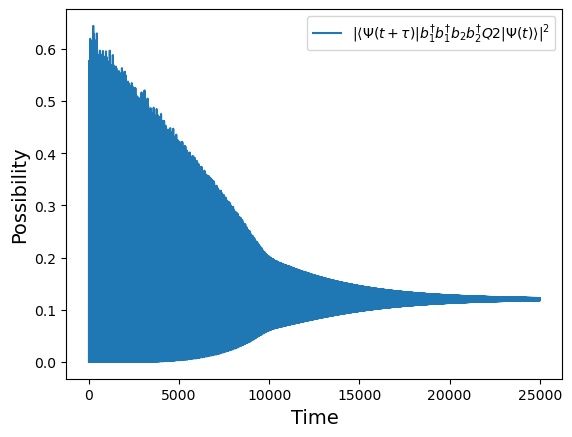

In [19]:
# 绘制结果
plt.figure()
# plt.plot(times, expectation_values_Q1, label=r'$\langleΨ(t+\tau)|b_1^{\dagger} b_1^{\dagger} b_2^{\dagger} b_2Q1|Ψ(t) \rangle$')
# plt.plot(times, expectation_values_Q2, label=r'$\langleΨ(t+\tau)|b_1^{\dagger} b_1^{\dagger} b_2 b_2^{\dagger}Q2|Ψ(t) \rangle$')
# plt.plot(times, possibility_Q1, label=r'$|\langleΨ(t+\tau)|b_1^{\dagger} b_1^{\dagger} b_2^{\dagger} b_2Q1|Ψ(t) \rangle|^2$')
plt.plot(times, possibility_Q2, label=r'$|\langleΨ(t+\tau)|b_1^{\dagger} b_1^{\dagger} b_2b_2^{\dagger}Q2|Ψ(t) \rangle|^2$')
plt.xlabel('Time',fontsize=14)
plt.ylabel('Possibility',fontsize=14)
plt.legend()
plt.show()